In [1]:
import sys
# на уровень выше из research_rank/
sys.path.insert(0, '..')
from pathlib import Path
import numpy as np
import pandas as pd
import json
from collections import defaultdict
from plot_json import convert_dictlist_to_matrix
import matplotlib.pyplot as plt
from Tomography_qutrit import*

/Users/denis/Desktop/VS code projects/Quantum_tools/Tomography/src/research_data/../Adaptive_compresive_cending_qutrit.py:372: SyntaxWarning: invalid escape sequence '\m'
  label='$S_{\mathrm{cvx}} \pm$ std')
/Users/denis/Desktop/VS code projects/Quantum_tools/Tomography/src/research_data/../Adaptive_compresive_cending_qutrit.py:379: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_ylabel('$S_{\mathrm{cvx}}$')


(CVXPY) Aug 01 01:44:14 PM: Encountered unexpected exception importing solver MOSEK:
AttributeError("module 'mosek' has no attribute 'conetype'")


In [2]:
from Qutrit import*
print(oper_fedorov_basis.shape)




(3, 3, 3, 3)


100%|██████████| 10/10 [00:39<00:00,  3.93s/it]

Mean fidelity: [1.         1.00000203 0.99998153] 	Std fidelity: [1.60576825e-08 3.20606689e-06 4.35254012e-05]
Mean svx for protocol: [1.00000000e+00 7.98236349e-05 4.14692597e-04] 	Std s_cvx for protocol: [0.00000000e+00 2.12144445e-05 1.22656217e-03]



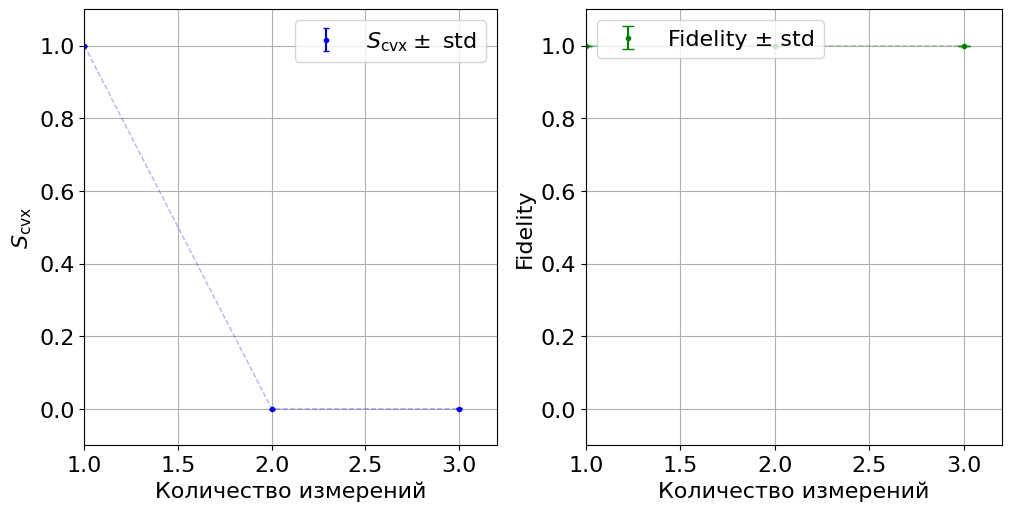

In [4]:

from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 16,          # Размер заголовка
    'axes.labelsize': 16,          # Размер подписей осей
    'xtick.labelsize': 16,         # Размер цифр на оси X
    'ytick.labelsize': 16,         # Размер цифр на оси Y
    'legend.fontsize': 16          # Размер шрифта легенды
})

protocol = [diag((1,1,1)), Gl_2(pi / 8), Gl_2(pi / 8) @ Gl_8(0)]

tomography_1 = ACT(protocol, 1, 3)
x = np.array([1, 2, 3])
svx_list = []         
fidelity_list = []
N = 10


for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max, x_min_list, x_max_list, state_ml = tomography_1.main(epsilon=10**-5)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]), tomography_1.Fidelity(x_min_list[2], x_max_list[2])]#, tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
print()
pl_fid_s_cvx(x, y, std, fidelity_mean, fidelity_std)